## Predicting Heart Disease

This notebook looks into using various Python-based machine learning (ML) and data science libraries in an attempt to build a ML model capable of predicting whether someone has heart disease based on their medical attributes.

The follow approaches will be taken:
1) Problem Definition
2) Data
3) Evaluation
4) Features
5) Modelling
6) Experimentation

---
### 1. Problem Definition
In a statement:
> Given clinical parameters about a patient, can we predict whether they have heart disease.

### 2. Data
The original data came from the Cleveland data from the UCI Machine Learning Repository:

https://archive.ics.uci.edu/dataset/45/heart+disease

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll purse the project.

### 4. Features
Information about each features of the data:

**Features**

1) **age** - age in years
2) **sex** - (1 = male; 0 = female)
3) **cp** - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4) **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5) **chol** - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6) **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7) **restecg** - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8) **thalach** - maximum heart rate achieved
9) **exang** - exercise induced angina (1 = yes; 0 = no)
10) **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
     7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)


---
### Importation of Libraries

In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

---
### Load Data

In [2]:
# Read Data
df = pd.read_csv('heart-disease.csv')

# Inspect Dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---
### EDA (Exploratory Data Analysis)
The goal here is to find out more about the data and become a subject matter expert on the dataset.

**Checklist:**
1) What question(s) are we trying to solve?
2) What kind of data do we have and how do we treat different types?
3) What's missing from the data and how do you deal with it?
4) Where are the outliers and how do we deal with it?
5) How can we add, change or remove features to get more out of the data?

<Axes: xlabel='target'>

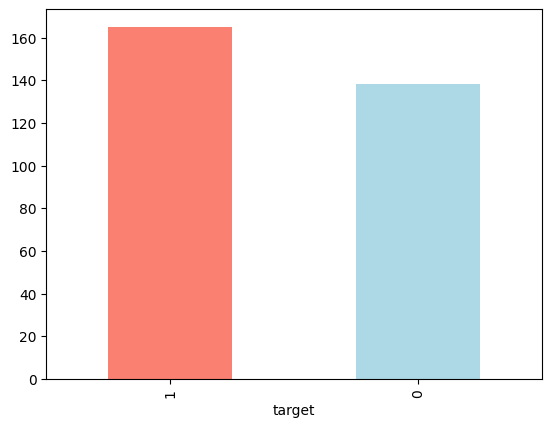

In [3]:
# Find out how many of each class there are for 'target'
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [4]:
# Determine if there exists any missing values
df.info()

## OR 
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Summary Statistics of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### EDA - Finding Patterns

##### Heart Disease Frequency According to Sex

In [6]:
df['sex'].value_counts() # 0: Female, 1: Male

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
# Compare 'target' with 'sex'
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


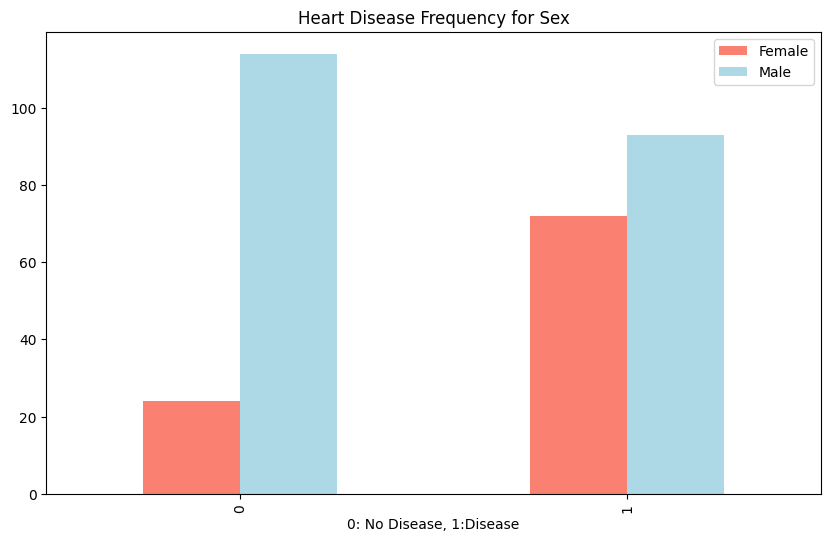

In [8]:
# Plot 'target' against 'sex'
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0: No Disease, 1:Disease")
plt.legend(['Female','Male'])

##### Age vs Max Heart Rate ("thalach") for Heart Disease

In [9]:
df[df['target']==1]['age']

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

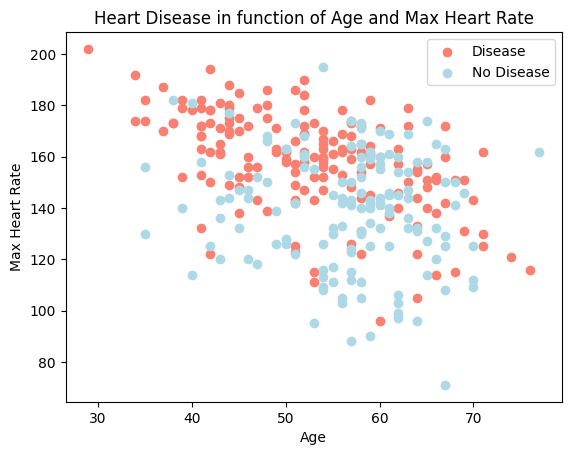

In [10]:
# Scatterplot for positive (Disease) examples
plt.scatter(df[df['target']==1]['age'],
            df[df['target']==1]['thalach'],
            c='salmon')

# Scatterplot for negative (No-Disease) examples
plt.scatter(df[df['target']==0]['age'],
            df[df['target']==0]['thalach'],
            c='lightblue')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease'])

Text(0, 0.5, 'Frequency')

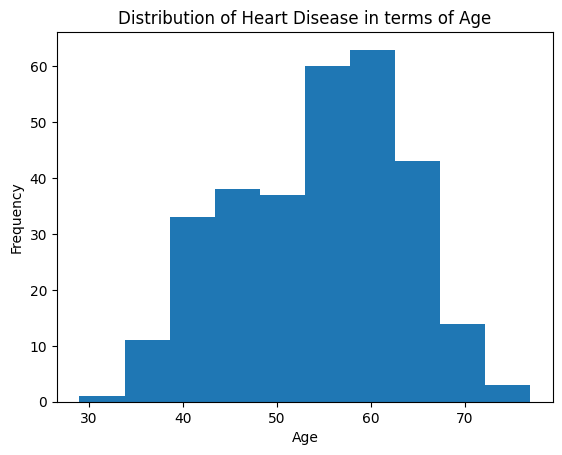

In [11]:
# Check distribution of 'age' using histogram
plt.hist(df['age'])

plt.title("Distribution of Heart Disease in terms of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

##### Heart Disease Frequency per Chest Pain Type ("cp")
**cp** - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [12]:
# Compare 'cp' with 'target'
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


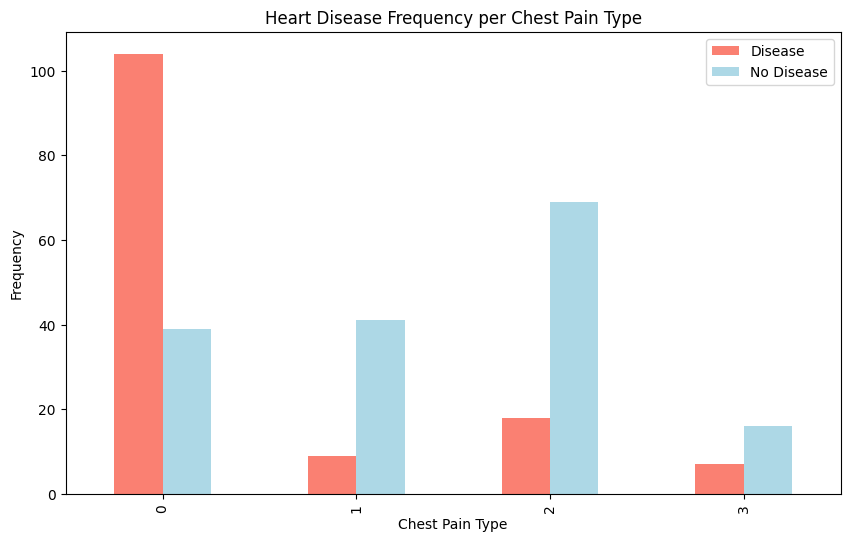

In [13]:
# Plot 'cp' against 'target'
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(['Disease', 'No Disease'])

#### EDA - Correlation Matrix


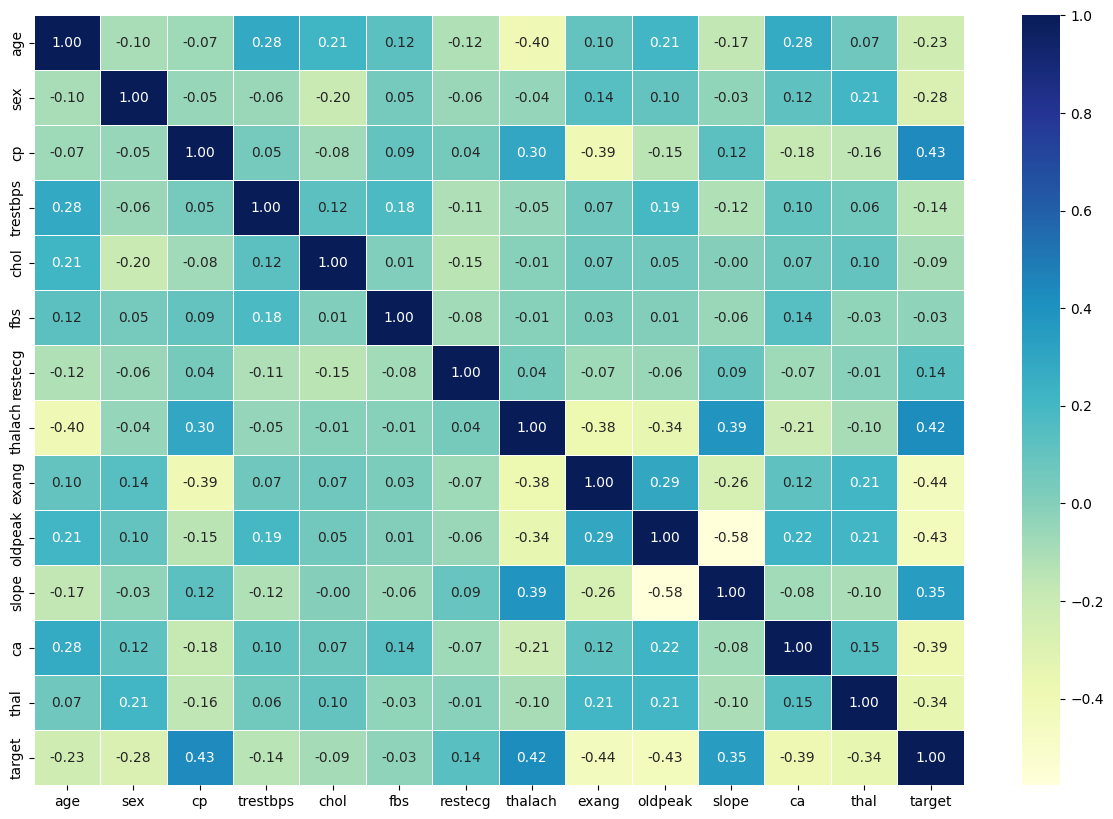

In [14]:
# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

---
### Modelling
Based on: https://scikit-learn.org/stable/machine_learning_map.html, 3 different machine learning models will be evaluated:
1) Logistic Regression
2) kNN
3) Random Forest Classifier



In [15]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df['target']

# Check
X.shape, y.shape

((303, 13), (303,))

In [16]:
np.random.seed(42)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [17]:
# Compile all models into a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given machine learning models.
    
    models: a dict of different machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels 
    """
    # Set random seed
    np.random.seed(42)

    # Dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit model to the data
        model.fit(X_train, y_train)

        # Evaluate model then append its score to 'model_scores'
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
# Fit and Evaluate score of each model
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

<Axes: >

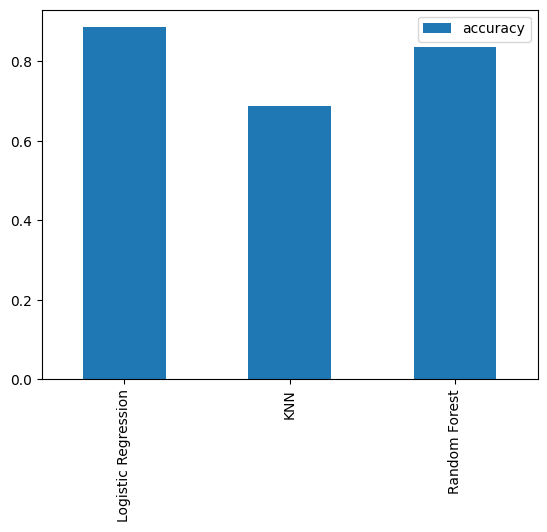

In [19]:
# Visualize models' score using bar chart
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

#### Steps to consider after modelling:
1) Hyperparameter Tuning
2) Evaluate Models (Beyond Accuracy)
    - ROC Curve & AUC Score
    - Confusion Matrix
    - Classification Report
    - Cross-Validation
    - Precision
    - Recall
    - F1-Score
3) Feature Importance

---
### Hyperparameter Tuning (kNN)
Parameters to tune are decided based on:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
# Create list to store training and testing scores
train_scores = []
test_scores = []

# Create a list of different values for n-neighbours
neighbours = range(1, 21) # n = 1 to 20

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbours
for n in neighbours:
    knn.set_params(n_neighbors=n)

    # Fit the model
    knn.fit(X_train, y_train)

    # Update training and testing scores list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum kNN score on the test data: 75.41% at n = 11


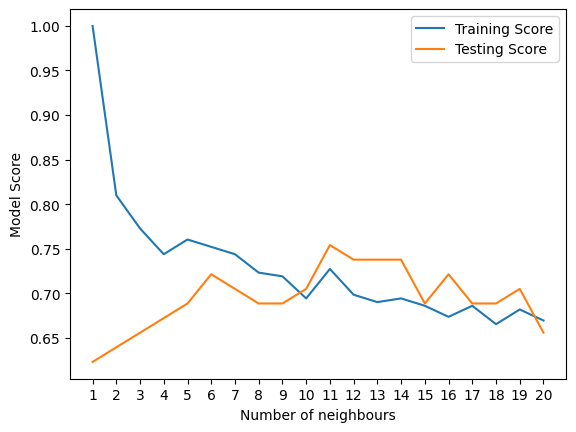

In [21]:
# Visualize scores for each neighbor
plt.plot(neighbours, train_scores, label="Training Score")
plt.plot(neighbours, test_scores, label="Testing Score")

plt.xticks(np.arange(1, 21, 1))

plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

# Find max score and the corresponding n
max_score = max(test_scores)
best_n = neighbours[test_scores.index(max_score)]

print(f"Maximum kNN score on the test data: {max_score*100:.2f}% at n = {best_n}")

#### Hyperparameter Tuning (Logistic Regression & Random Forest) using `RandomizedSearchCV`
Parameters to tune are decided based on:
- **Logistic Regression:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- **Random Forest:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20), # -4 to 4 spaced evenly on a log scale
    "solver": ['liblinear']
}

# Create hyperparameter grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [23]:
## Tune Logistic Regression
# Setup random hyperparameter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search  
rs_log_reg.fit(X_train, y_train)  

# Best params
rs_log_reg.best_params_

# Evaluate test score after tuning
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [24]:
## Tune Random Forest
# Setup random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search  
rs_rf.fit(X_train, y_train)  

# Best params
rs_rf.best_params_

# Evaluate test score after tuning
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

#### Hyperparameter Tuning (Logistic Regression & Random Forest) using `GridSearchCV`
Parameters to tune are decided based on:
- **Logistic Regression:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- **Random Forest:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
## Tune Logistic Regression
# Setup grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

# Fit random hyperparameter search  
gs_log_reg.fit(X_train, y_train)  

# Best params
gs_log_reg.best_params_

# Evaluate test score after tuning
gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [ ]:
## Tune Random Forest
# Setup grid hyperparameter search
gs_rf = GridSearchCV(RandomForestClassifier(),
                                param_grid=rf_grid,
                                cv=5,                                
                                verbose=True)

# Fit random hyperparameter search  
gs_rf.fit(X_train, y_train)  

# Best params
gs_rf.best_params_

# Evaluate test score after tuning
gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


---
### Evaluating Model (Beyond Accuracy)
- ROC Curve & AUC Score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-Score

##### Model Chosen: **Logistic Regression (GridSearchCV)**


##### ROC Curve

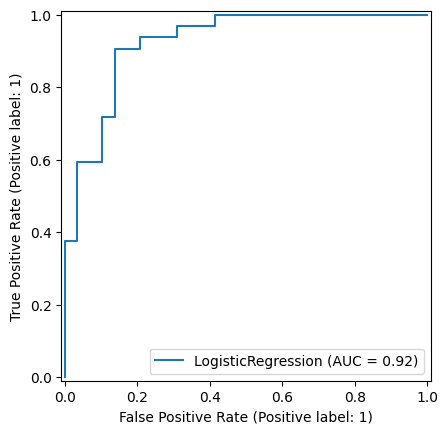

In [26]:
# Create predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

# Plot ROC curve and calculate AUC 
RocCurveDisplay.from_estimator(gs_log_reg.best_estimator_, X_test, y_test)

##### Confusion Matrix

In [27]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

##### Classification Report
**Take Note:** The scores here are only based on 1 split, hence have to use CV to calculate evaluation metrics

In [28]:
print(classification_report(y_test, y_preds)) 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##### Calculate Evaluation Metrics using CV

,Accuracy,Precision,Recall,F1
Scores,0.847978,0.821587,0.927273,0.87054


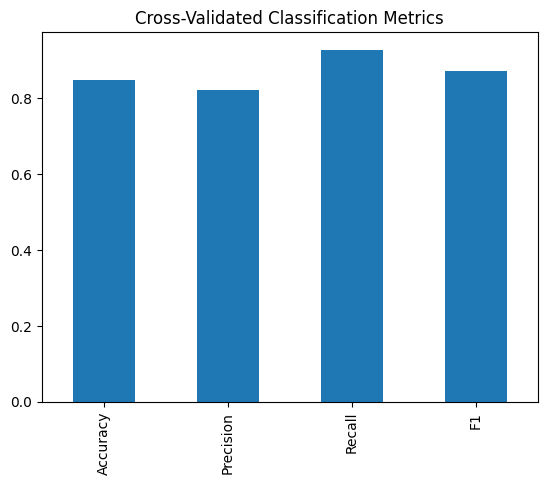

In [29]:
# Create new classifier with best params
clf = LogisticRegression(**gs_log_reg.best_params_)

# CV Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

# CV Precision
cv_precision= cross_val_score(clf, X, y, cv=5, scoring='precision').mean()

# CV Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall').mean()

# CV Precision
cv_f1= cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

# Visualize Cross-Validated Metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1},
    index=["Scores"]
)

cv_metrics.T.plot.bar(
    title="Cross-Validated Classification Metrics",
    legend=False
)
cv_metrics

---
### Feature Importance

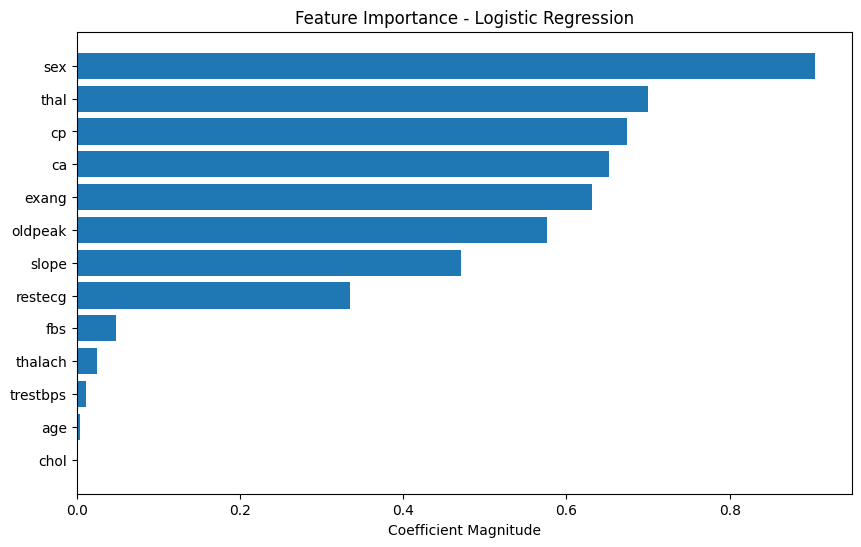

In [30]:
# Create new classifier with best params
clf = LogisticRegression(**gs_log_reg.best_params_)

# Fit classifier
clf.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": np.abs(clf.coef_[0])  
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance

# Visualize
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()  # highest importance at top
plt.show()

---
### Experimentation
**If evaluation metrics were not achieved, ask yourself:**
1) Could you collect more data?
2) Could you try a better or more complex models?
3) Can the current models be further improved?

